In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
import json

token = {"username":"gschandra5258","key":"ce6cf0bda92c1d102f3924f8b5b4dce8"}

with open('/content/.kaggle/kaggle.json','w') as f:
  json.dump(token, f)

In [ ]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s 'NIH Chest X-rays'

ref                                            title                                      size  lastUpdated          downloadCount  
---------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
nih-chest-xrays/data                           NIH Chest X-rays                           42GB  2018-02-21 20:52:23          38127  
nih-chest-xrays/sample                         Random Sample of NIH Chest X-ray Dataset    4GB  2017-11-23 02:58:24           9834  
jbeltranleon/nih-chest-xrays-224-gray          NIH Chest X-rays 224 Gray                   2GB  2019-10-19 21:52:09             26  
neilturley/nihcc-chest-xray                    NIHCC Chest X-Ray                           2GB  2020-03-18 05:27:14            132  
kambarakun/nih-chest-xrays-trained-models      NIH Chest X-rays: Trained Models            3GB  2020-04-30 11:52:56              8  
jbeltranleon/nih-chest-xrays-224-rgb           NIH Chest X-rays 224 R

In [ ]:
!kaggle datasets download -d nih-chest-xrays/data -p /content

100% 42.0G/42.0G [13:46<00:00, 52.4MB/s]
100% 42.0G/42.0G [13:47<00:00, 54.5MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_010/images/00021835_001.png  
  inflating: images_010/images/00021835_002.png  
  inflating: images_010/images/00021835_003.png  
  inflating: images_010/images/00021835_004.png  
  inflating: images_010/images/00021835_005.png  
  inflating: images_010/images/00021835_006.png  
  inflating: images_010/images/00021835_007.png  
  inflating: images_010/images/00021835_008.png  
  inflating: images_010/images/00021835_009.png  
  inflating: images_010/images/00021835_010.png  
  inflating: images_010/images/00021835_011.png  
  inflating: images_010/images/00021835_012.png  
  inflating: images_010/images/00021835_013.png  
  inflating: images_010/images/00021835_014.png  
  inflating: images_010/images/00021835_015.png  
  inflating: images_010/images/00021835_016.png  
  inflating: images_010/images/00021835_017.png  
  inflating: images_010/images/00021835_018.png  
  inflating: images_010/images/00021835_019.png  

In [ ]:
!rm -rf data.zip

In [ ]:
!rm -rf images_010

In [ ]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Reading CSV file
df = pd.read_csv('/content/Data_Entry_2017.csv')

In [ ]:
#Reading all the images form all folders
data_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', '/content/images', 'images*', '*', '*.png'))}
df['path'] = df['Image Index'].map(data_image_paths.get)

In [ ]:
#Checking the CSV data and Images count
print('Scans found:', len(data_image_paths), ', Total Headers', df.shape[0])

Scans found: 84999 , Total Headers 84999


In [ ]:
#Comparing the images and csv file data to match with labels with images
df['path'] = df['Image Index'].map(data_image_paths.get)
df['Patient Age'] = df['Patient Age'].map(lambda x: int(x))
df.sample(3)

Image Index  ...                                               path
29021  00007565_003.png  ...  /content/images/images_004/images/00007565_003...
53143  00013408_017.png  ...  /content/images/images_006/images/00013408_017...
6700   00001803_014.png  ...  /content/images/images_002/images/00001803_014...

[3 rows x 12 columns]

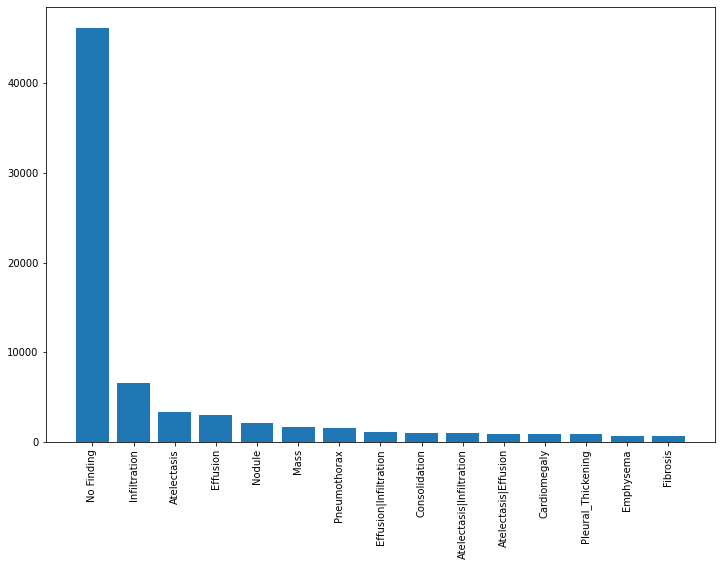

In [ ]:
#Diseases information from csv file
label_counts = df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [ ]:
#Removing No Finding labels data
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        df[c_label] = df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Image Index Finding Labels  ...  Pneumonia  Pneumothorax
79172  00019434_010.png       Effusion  ...        0.0           0.0
60046  00014822_021.png           Mass  ...        0.0           0.0
66079  00016332_003.png                 ...        0.0           0.0

[3 rows x 26 columns]

In [ ]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 8873), ('Cardiomegaly', 2158), ('Consolidation', 3695), ('Edema', 1843), ('Effusion', 9892), ('Emphysema', 1906), ('Fibrosis', 1469), ('Infiltration', 14313), ('Mass', 4519), ('Nodule', 4757), ('Pleural_Thickening', 2503), ('Pneumonia', 1112), ('Pneumothorax', 3675)]


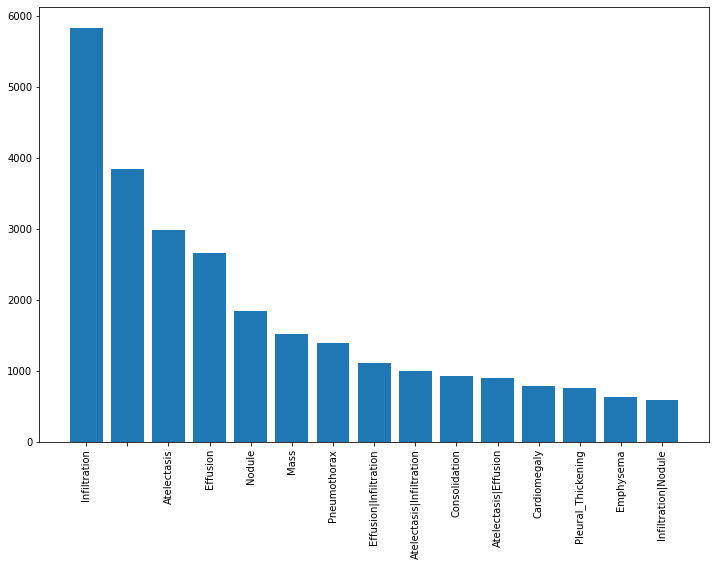

In [ ]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
df = df.sample(40000, weights=sample_weights)
label_counts = df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

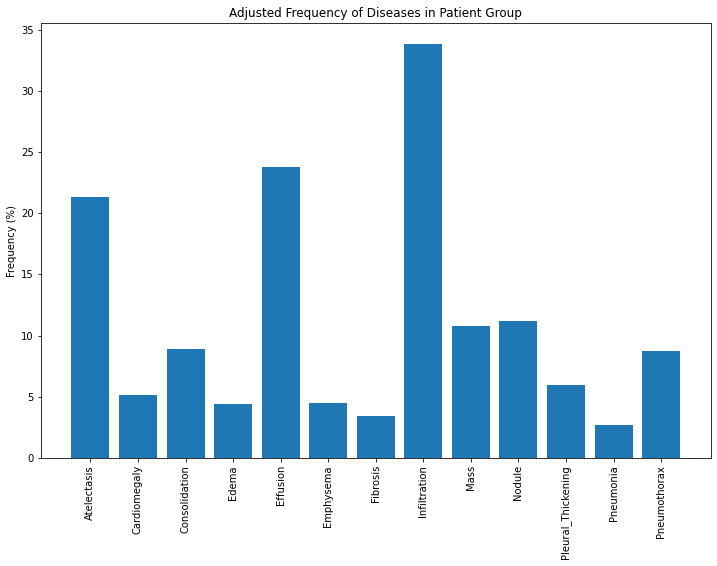

In [ ]:
label_counts = 100*np.mean(df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

Text(0.5, 1.0, 'Male and Female Patients count')

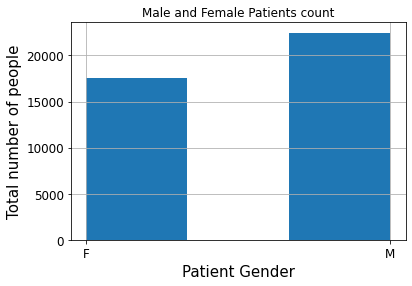

In [ ]:
#Gender wise patients count
df['Patient Gender'].hist(bins=3, xlabelsize=12, ylabelsize=12)
plt.ylabel("Total number of people", fontsize=15)
plt.xlabel("Patient Gender", fontsize=15)
plt.title("Male and Female Patients count")

In [ ]:
df['age'] = df ['Patient Age']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Male and Female Patients Age')

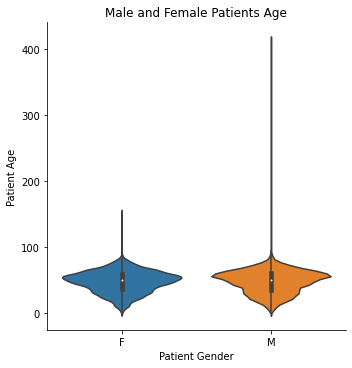

In [ ]:
import seaborn as sns
sns.catplot(x='Patient Gender', y='Patient Age', kind='violin', data=df)
plt.title("Male and Female Patients Age")

Patient Gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

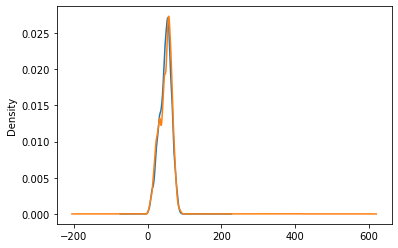

In [ ]:
import matplotlib.pyplot as plt
df.groupby('Patient Gender').age.plot(kind='kde')

In [ ]:
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [ ]:
for label in labels:
    if len(label) > 1:
        df[label] = df['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0.0)

In [ ]:
df.head()

Image Index          Finding Labels  ...  Pneumothorax  age
55156  00013812_008.png             Atelectasis  ...           0.0   82
38946  00010188_008.png             Atelectasis  ...           0.0   47
58632  00014520_008.png  Infiltration|Pneumonia  ...           0.0   32
37495  00009889_007.png   Atelectasis|Pneumonia  ...           0.0   24
77482  00019039_000.png                    Mass  ...           0.0   57

[5 rows x 27 columns]

In [ ]:
#one-hot encoding
#df.to_csv('one-hot enconde_file.csv')

In [ ]:
labels = [label for label in labels if df[label].sum() > 1000]
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

Train and Test Split

In [ ]:
image_size = 256
batch_size = 32

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(df, test_size=0.20, random_state=2018, stratify=df['Finding Labels'].map(lambda x: x[:4]))

In [ ]:
train_df['labels'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
valid_df['labels'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
core_idg = ImageDataGenerator(rescale=1 / 255,
                                  samplewise_center=True,
                                  samplewise_std_normalization=True,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  height_shift_range=0.05,
                                  width_shift_range=0.1,
                                  rotation_range=5,
                                  shear_range=0.1,
                                  fill_mode='reflect',
                                  zoom_range=0.15)

train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                                             directory=None,
                                             x_col='path',
                                             y_col='labels',
                                             class_mode='categorical',
                                             batch_size=batch_size,
                                             classes=labels,
                                             target_size=(image_size, image_size))

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df,
                                             directory=None,
                                             x_col='path',
                                             y_col='labels',
                                             class_mode='categorical',
                                             batch_size=batch_size,
                                             classes=labels,
                                             target_size=(image_size, image_size))

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                                                       directory=None,
                                                       x_col='path',
                                                       y_col='labels',
                                                       class_mode='categorical',
                                                       batch_size=1024,
                                                       classes=labels,
                                                       target_size=(image_size, image_size)))

Using TensorFlow backend.


Found 28862 validated image filenames belonging to 13 classes.
Found 7217 validated image filenames belonging to 13 classes.
Found 7217 validated image filenames belonging to 13 classes.


Sample Test Images

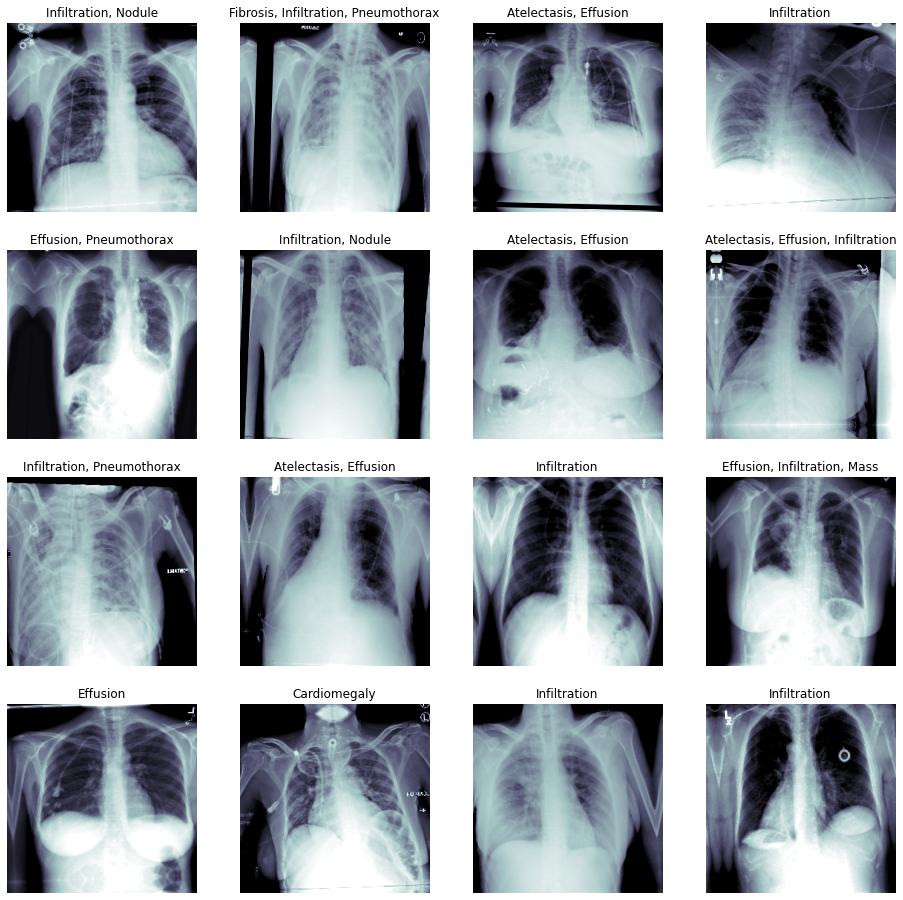

In [ ]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

MobileNet Architecture


In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_256 (Model)   (None, 8, 8, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                6669      
Total params: 3,760,333
Trainable params: 3,738,445
Non-trainable params: 21,888
_______________________________________

In [ ]:
#To handle the overift problem at run time we are using early stopping method
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')
#weight_path="{}_weights_5epochs.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list = [checkpoint, early]

In [ ]:
#Training the model with 5 epochs
multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 5, 
                                  callbacks = callbacks_list)

Epoch 1/5
100/100 [==============================] - 1013s 10s/step - loss: 0.4189 - binary_accuracy: 0.8527 - mae: 0.2045 - val_loss: 0.3384 - val_binary_accuracy: 0.8777 - val_mae: 0.1783

Epoch 00001: val_loss improved from inf to 0.33838, saving model to xray_class_weights.best.hdf5
Epoch 2/5
100/100 [==============================] - 1023s 10s/step - loss: 0.3472 - binary_accuracy: 0.8711 - mae: 0.1979 - val_loss: 0.4167 - val_binary_accuracy: 0.8777 - val_mae: 0.1451

Epoch 00002: val_loss did not improve from 0.33838
Epoch 3/5
100/100 [==============================] - 1157s 12s/step - loss: 0.3410 - binary_accuracy: 0.8730 - mae: 0.1962 - val_loss: 0.4524 - val_binary_accuracy: 0.8777 - val_mae: 0.1401

Epoch 00003: val_loss did not improve from 0.33838
Epoch 4/5
100/100 [==============================] - 1119s 11s/step - loss: 0.3357 - binary_accuracy: 0.8745 - mae: 0.1955 - val_loss: 0.4631 - val_binary_accuracy: 0.8777 - val_mae: 0.1378

Epoch 00004: val_loss did not improve

In [ ]:
multi_disease_model.load_weights(weight_path)

In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

1024/1024 [==============================] - 95s 92ms/step


In [ ]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(pred_Y,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: Dx: 23.44%, PDx: 22.28%
Cardiomegaly: Dx: 5.18%, PDx: 6.04%
Consolidation: Dx: 9.67%, PDx: 3.16%
Edema: Dx: 4.79%, PDx: 3.01%
Effusion: Dx: 27.44%, PDx: 22.41%
Emphysema: Dx: 3.91%, PDx: 3.44%
Fibrosis: Dx: 3.91%, PDx: 2.66%
Infiltration: Dx: 36.33%, PDx: 24.39%
Mass: Dx: 10.74%, PDx: 9.26%
Nodule: Dx: 13.57%, PDx: 9.24%
Pleural_Thickening: Dx: 6.45%, PDx: 4.07%
Pneumonia: Dx: 2.93%, PDx: 1.46%
Pneumothorax: Dx: 10.64%, PDx: 11.33%


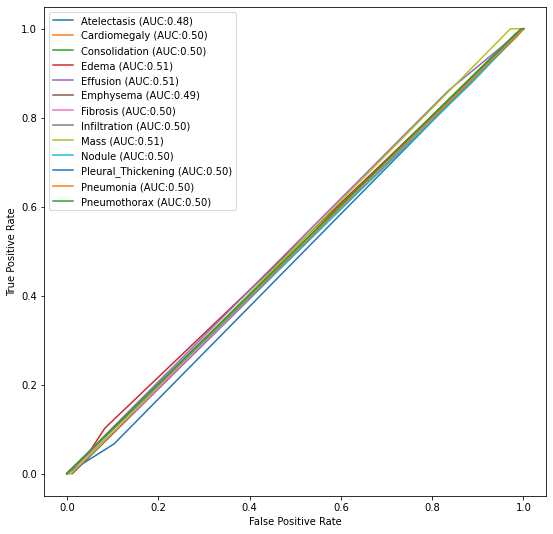

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

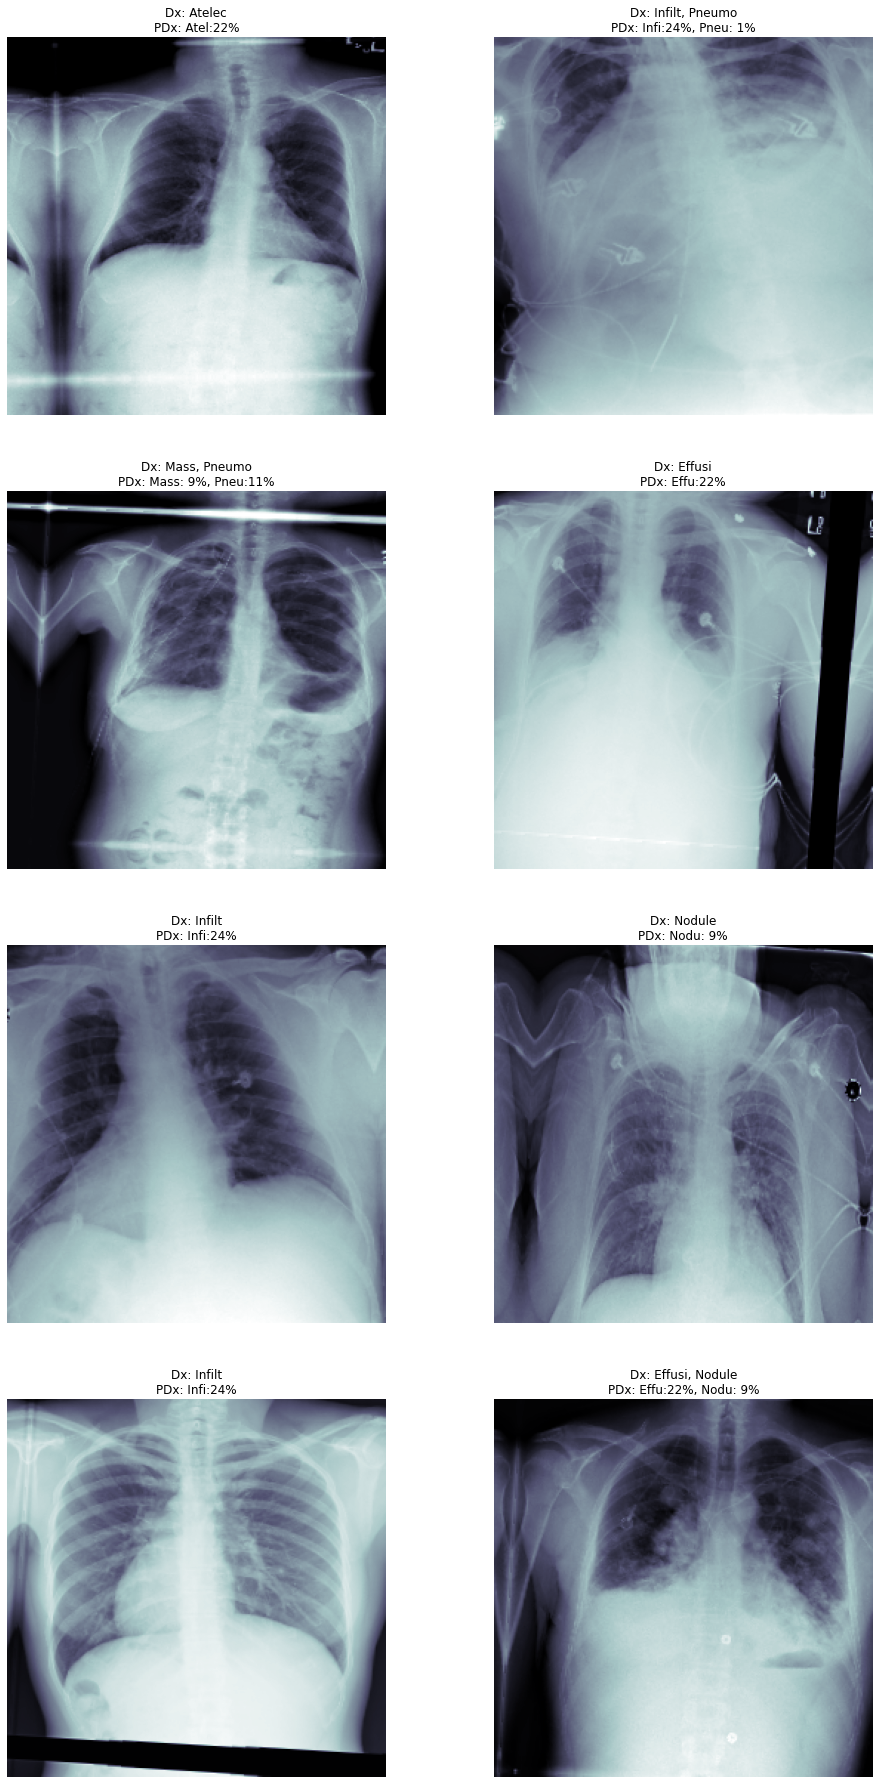

In [ ]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

VGG16 Architecture

In [ ]:
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
traindata = train_gen
testdata = test_X, test_Y

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(256,256,3), filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [ ]:
#model.load_weights('vggweights.h5')
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_vggweights.h5".format('sray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list = [checkpoint, early]

for layer in model.layers:
  layer.trainable = False
model.add(Flatten())

model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=13,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae']) #, metrics=['accuracy']) #keras.losses.categorical_crossentropy

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 256)      

In [ ]:
hist = model.fit_generator(generator=traindata, steps_per_epoch = 100,
                           validation_data =  (test_X, test_Y), 
                           epochs = 3, 
                           callbacks = callbacks_list)

Epoch 1/3
100/100 [==============================] - 2922s 29s/step - loss: 0.3545 - binary_accuracy: 0.8751 - mae: 0.1704 - val_loss: 0.3448 - val_binary_accuracy: 0.8777 - val_mae: 0.1672

Epoch 00001: val_loss improved from inf to 0.34477, saving model to sray_class_vggweights.h5
Epoch 2/3
100/100 [==============================] - 2889s 29s/step - loss: 0.3428 - binary_accuracy: 0.8789 - mae: 0.1663 - val_loss: 0.3428 - val_binary_accuracy: 0.8777 - val_mae: 0.1674

Epoch 00002: val_loss improved from 0.34477 to 0.34282, saving model to sray_class_vggweights.h5
Epoch 3/3
100/100 [==============================] - 2893s 29s/step - loss: 0.3461 - binary_accuracy: 0.8769 - mae: 0.1683 - val_loss: 0.3415 - val_binary_accuracy: 0.8777 - val_mae: 0.1675

Epoch 00003: val_loss improved from 0.34282 to 0.34146, saving model to sray_class_vggweights.h5


In [ ]:
model.load_weights(weight_path)

In [ ]:
pred_Z = model.predict(test_X, batch_size = 32, verbose = True)

1024/1024 [==============================] - 678s 662ms/step


In [ ]:
# look at how often the algorithm predicts certain diagnoses 
for d_label, bt_count, lp_count in zip(all_labels, 
                                     100*np.mean(pred_Z,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (d_label, bt_count, lp_count))

Atelectasis: Dx: 13.22%, PDx: 23.44%
Cardiomegaly: Dx: 3.36%, PDx: 5.18%
Consolidation: Dx: 5.33%, PDx: 9.67%
Edema: Dx: 3.41%, PDx: 4.79%
Effusion: Dx: 17.23%, PDx: 27.44%
Emphysema: Dx: 3.26%, PDx: 3.91%
Fibrosis: Dx: 2.28%, PDx: 3.91%
Infiltration: Dx: 22.83%, PDx: 36.33%
Mass: Dx: 8.50%, PDx: 10.74%
Nodule: Dx: 9.07%, PDx: 13.57%
Pleural_Thickening: Dx: 3.17%, PDx: 6.45%
Pneumonia: Dx: 1.90%, PDx: 2.93%
Pneumothorax: Dx: 6.46%, PDx: 10.64%


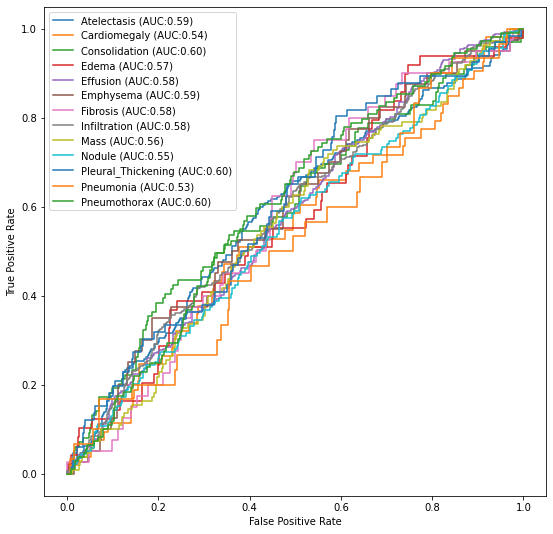

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, f_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, d_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Z[:,idx])
    f_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (d_label, auc(fpr, tpr)))
f_ax.legend()
f_ax.set_xlabel('False Positive Rate')
f_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_VGG16_net.png')

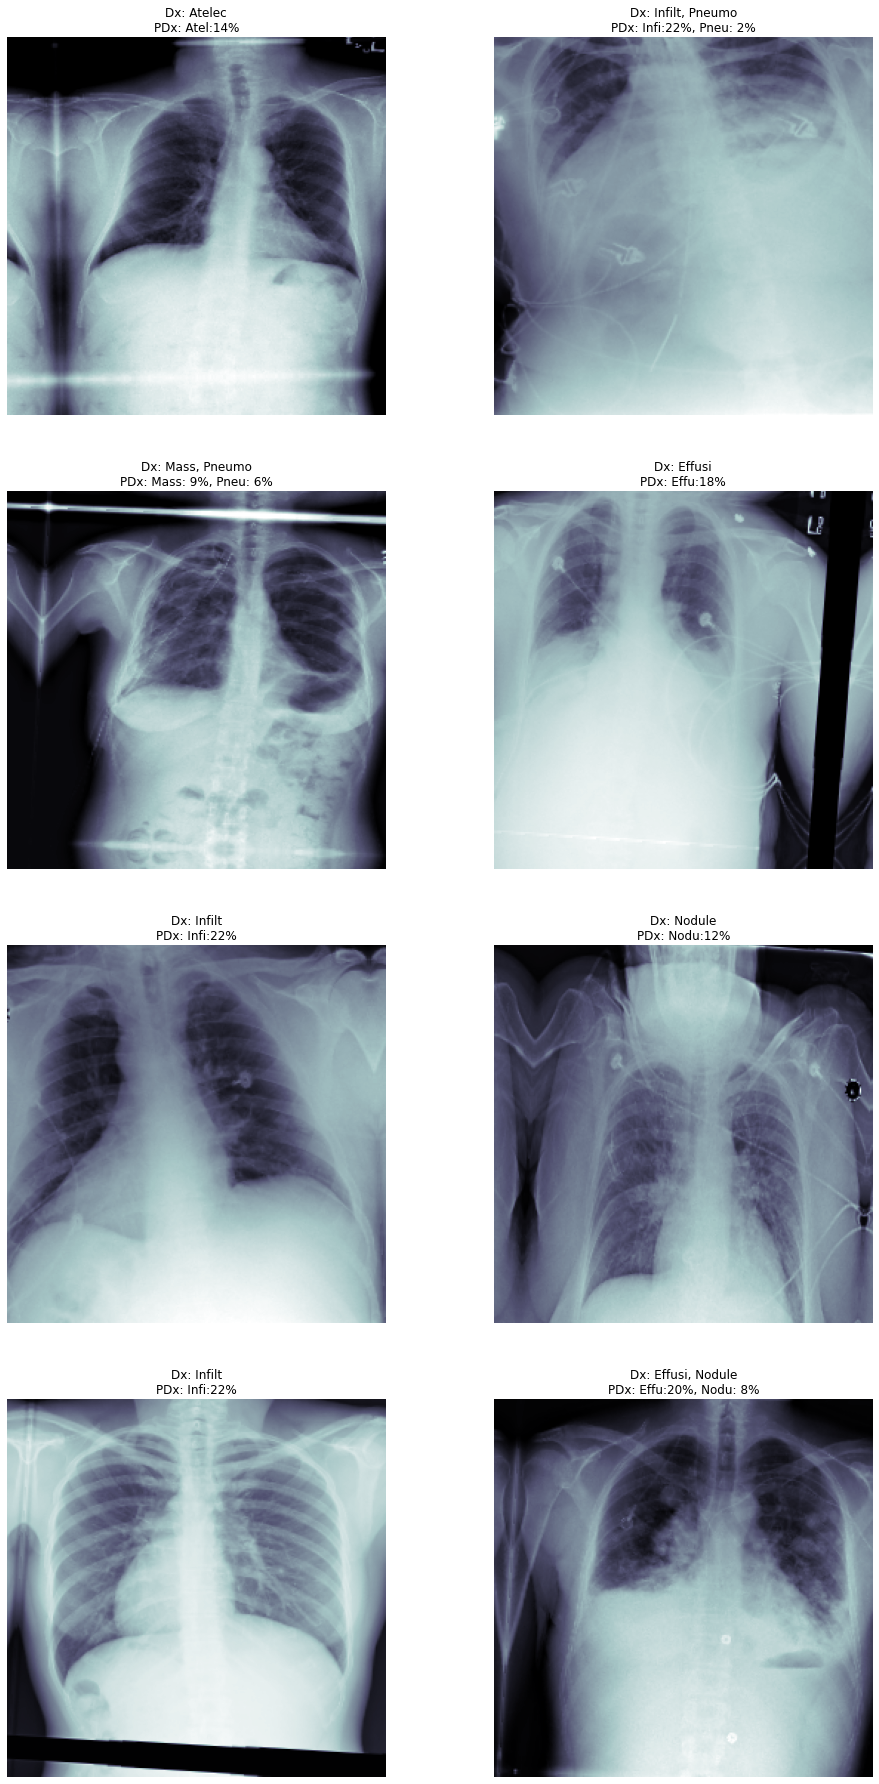

In [ ]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Z[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_VGG16_predictions.png')